### Quora example
https://www.quora.com/What-are-the-main-differences-between-TensorFlow-and-SciKit-Learn

What are the main differences between TensorFlow and SciKit Learn?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

from sklearn.linear_model import LogisticRegression
import tensorflow as tf


In [3]:

 
# Loading Data
iris = load_iris()
X = iris.data[:, [0, 3]] # sepal length and petal width
y = iris.target
 
# standardize
X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
 
lr = LogisticRegression(penalty='l2', 
                        dual=False, 
                        tol=0.000001, 
                        C=10.0,
                        fit_intercept=True, 
                        intercept_scaling=1, 
                        class_weight=None, 
                        random_state=1, 
                        solver='newton-cg', 
                        max_iter=100, 
                        multi_class='multinomial', 
                        verbose=0, 
                        warm_start=False, 
                        n_jobs=1)
lr.fit(X, y) 
y_pred = lr.predict(X)
print('Last 3 Class Labels: %s' % y_pred[-3:])

Last 3 Class Labels: [2 2 2]


MLXTEND  
Needed to install it first, see https://conda-forge.org/ or https://rasbt.github.io/mlxtend/installation/

For more on mlxtend Plotting Decision Regions
see https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/

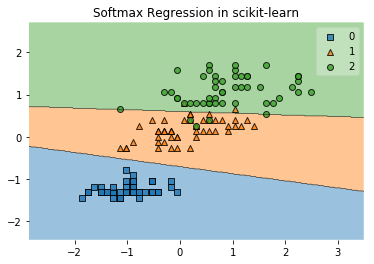

In [4]:
from mlxtend.plotting import plot_decision_regions #used to be from mlxtend.evaluate
 
plot_decision_regions(X, y, clf=lr)
plt.title('Softmax Regression in scikit-learn')
plt.show()

### TensorFlow
tried but this example code no longer works.  
Git reference  
https://github.com/rasbt/python-machine-learning-book/blob/master/faq/tensorflow-vs-scikitlearn.md

Submitted as an issue.
https://github.com/rasbt/python-machine-learning-book/issues

In [8]:
# Construct the Graph
g = tf.Graph()
with g.as_default():

    if init_weights:
        self._n_classes = np.max(y) + 1
        self._n_features = X.shape[1]
        tf_weights_, tf_biases_ = self._initialize_weights(n_features=self._n_features, n_classes=self._n_classes)
        self.cost_ = []
    else:
        tf_weights_ = tf.Variable(self.weights_)
        tf_biases_ = tf.Variable(self.biases_)

    # Prepare the training data
    y_enc = self._one_hot(y, self._n_classes)
    n_idx = list(range(y.shape[0]))
    tf_X = tf.convert_to_tensor(value=X, dtype=self.dtype)
    tf_y = tf.convert_to_tensor(value=y_enc, dtype=self.dtype)
    tf_idx = tf.placeholder(tf.int32, shape=[int(y.shape[0] / n_batches)])
    X_batch = tf.gather(params=tf_X, indices=tf_idx)
    y_batch = tf.gather(params=tf_y, indices=tf_idx)

    # Setup the graph for minimizing cross entropy cost
    logits = tf.matmul(X_batch, tf_weights_) + tf_biases_
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, y_batch)
    cost = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=self.eta)
    train = optimizer.minimize(cost)

    # Initializing the variables
    init = tf.initialize_all_variables()

NameError: name 'init_weights' is not defined

In [7]:
# Launch the graph
with tf.Session(graph=g) as sess:
    sess.run(init)
    self.init_time_ = time()
    for epoch in range(self.epochs):
        if self.minibatches > 1:
            n_idx = np.random.permutation(n_idx)
        minis = np.array_split(n_idx, self.minibatches)
        costs = []
        for idx in minis:
            _, c = sess.run([train, cost], feed_dict={tf_idx: idx})
            costs.append(c)

NameError: name 'init' is not defined

Note from https://github.com/rasbt/python-machine-learning-book/blob/master/faq/tensorflow-vs-scikitlearn.md

For demonstration purposes, I have implemented Softmax regression via TensorFlow in an object oriented style that is somewhat similar to scikit-learn's implementation. The complete code example can be found here if you are interested: [mlxtend/tf_classifier/TfSoftmax](https://github.com/rasbt/mlxtend/blob/master/mlxtend/tf_classifier/tf_softmax.py).

In [13]:
from mlxtend.tf_classifier import TfSoftmaxRegression

lr = TfSoftmaxRegression(eta=0.75,
                         epochs=1000,
                         print_progress=True,
                         minibatches=1,
                         random_seed=1)

lr.fit(X, y)
#Epoch: 1000/1000 | Cost 0.12

plt.plot(range(len(lr.cost_)), lr.cost_)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

AttributeError: module 'mlxtend.classifier.softmax_regression' has no attribute 'softmax_regression'